# A. Importing libs

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# B. Importing files

In [2]:
# defining path
path = r'C:\Users\hiron\Documents\050924_Instakart Basket analysis'

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_grouping.pkl'))

# C. Creating first charts in Python yay

## Bar chart

In [4]:
ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,number_of_orders,weekday,order_hour_of_day,...,reordered,price_range_loc,busiest days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since_lastorder,frequency_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,0,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low-spender,8.0,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1,Mid-range product,Regularly busy,average orders,32,Regular customer,6.935811,Low-spender,8.0,Frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,0,Mid-range product,Busiest days,average orders,5,New customer,7.930208,Low-spender,8.0,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,0,Mid-range product,slowest days,Most orders,3,New customer,4.972414,Low-spender,9.0,Frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,1,Mid-range product,slowest days,average orders,3,New customer,4.972414,Low-spender,9.0,Frequent customer


In [5]:
ords_prods_merge.shape

(32404859, 22)

In [6]:
ords_prods = ords_prods_merge.drop(columns = ['busiest days','price_range_loc','busiest_period_of_day','loyalty_flag','spending_flag','frequency_flag','median_days_since_lastorder'])

In [7]:
ords_prods.shape

(32404859, 15)

In [8]:
ords_prods.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,number_of_orders,weekday,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,mean_price
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,32,6.935811
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,32,6.935811
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,5,7.930208
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,NaN,10,0,3,4.972414
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,11,1,3,4.972414


<Axes: xlabel='weekday'>

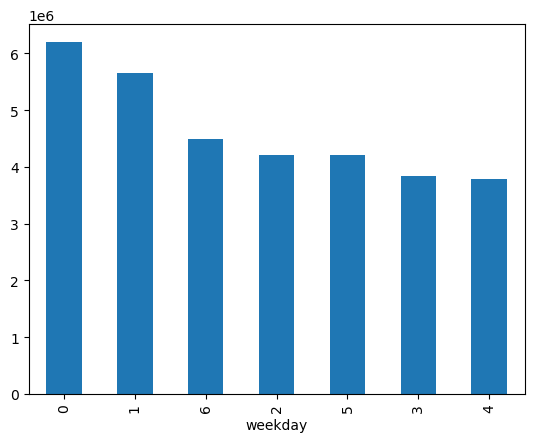

In [9]:
ords_prods['weekday'].value_counts().plot.bar()

<Axes: xlabel='weekday'>

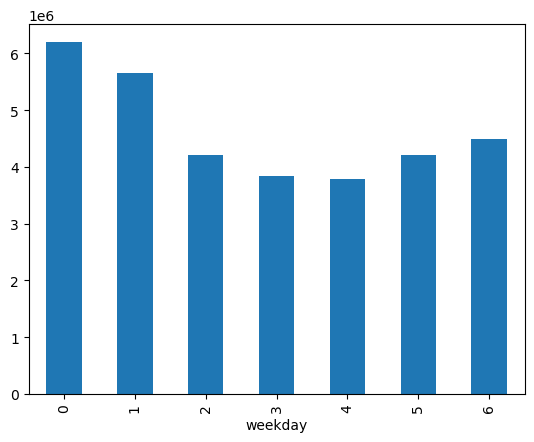

In [10]:
# If we want to display it by the index increainsg
ords_prods['weekday'].value_counts().sort_index().plot.bar()

<Axes: xlabel='weekday'>

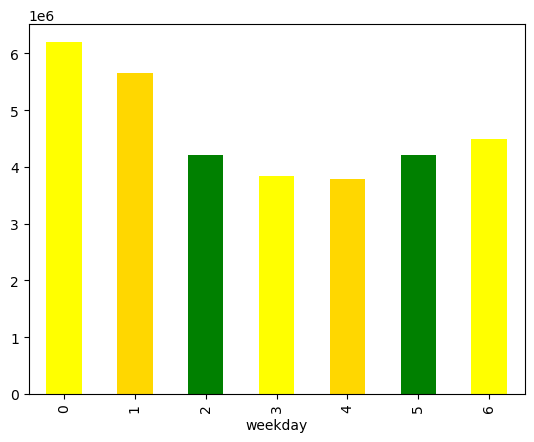

In [11]:
# to change color
ords_prods['weekday'].value_counts().sort_index().plot.bar(color = ['yellow','gold','green'])

# D. Exporting charts

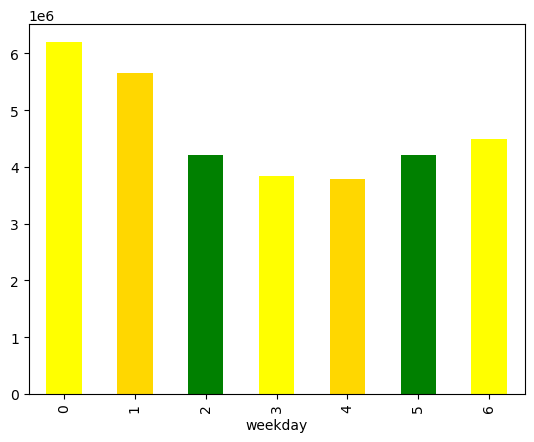

In [12]:
# First save it in an object lets say bar
bar = ords_prods['weekday'].value_counts().sort_index().plot.bar(color = ['yellow','gold','green'])

In [13]:
# This is now accessible via bar.figure command

In [14]:
# The next step is to export it outside of Jupyter in the form of an image file. This can be done via the figure.savefig() function

In [15]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_weekday.png'))

## Creating histograms and scatterplots

<Axes: ylabel='Frequency'>

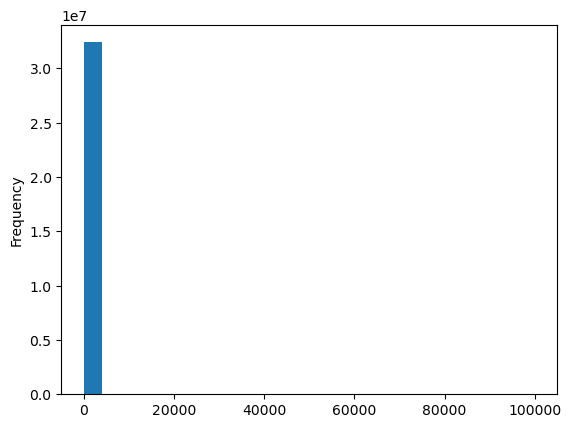

In [16]:
# Creating an histogram
ords_prods['prices'].plot.hist(bins = 25)

In [17]:
ords_prods['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [18]:
# Lets try investigating using a scatterplot

In [19]:
# lets try to find outliers and see what they are
ords_prods.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,number_of_orders,weekday,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,mean_price
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,5.0,5,0,40,108.648299
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,4.0,3,1,40,108.648299
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,13.0,6,0,4,1154.792308
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,12.0,3,1,4,1154.792308
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,30.0,9,0,16,114.426619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,4.0,1,0,39,1106.743956
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,2.0,1,1,39,1106.743956
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,8.0,25,0,15,451.153540
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,4.0,8,0,12,1178.381871


In [20]:
# SInce the values dont make sense, we will assign them as nan or uknown
ords_prods.loc[ords_prods['prices'] >100, 'prices'] = np.nan

In [21]:
ords_prods['prices'].max()

25.0

<Axes: ylabel='Frequency'>

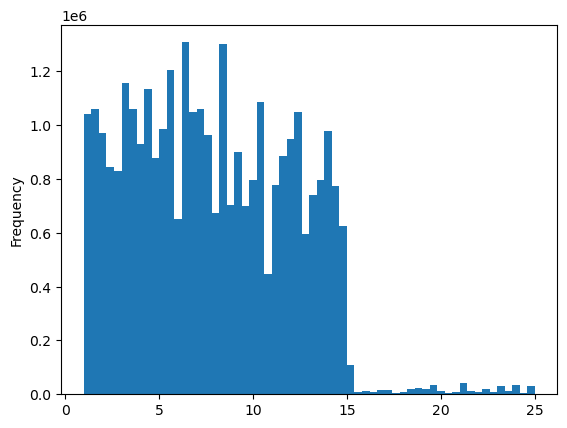

In [22]:
# Creating an histogram
ords_prods['prices'].plot.hist(bins = 60)

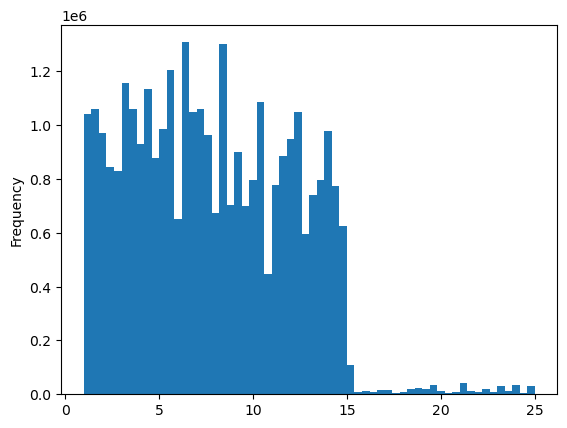

In [23]:
hist = ords_prods['prices'].plot.hist(bins = 60)

In [24]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

## Creating line chart

In [25]:
# will need subsetting since it takes a lot of computing power

In [26]:
df = ords_prods[:2000000]

# E. Sampling data

### So, to recap each piece of the split code, you need to:

Set the seed for the random number generator.
Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.
Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
Store the results of the test in a new list, dev, in the form of boolean values (True and False).

In [27]:
np.random.seed(4)   # the number is not significant - you can put anything just use same thorughout for reproducability

In [28]:
dev = np.random.rand(len(ords_prods)) <= 0.7   # this creates a boolean 
# np.random.rand will create numbers between 0 and 1

In [29]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [30]:
# Storing 70% of the datafreame in new subset big
big = ords_prods[dev]

In [31]:
# Storing 30% of the datafreame in new subset small
small = ords_prods[~dev]

In [32]:
len(ords_prods)

32404859

In [33]:
len(big) + len(small)

32404859

In [34]:
# Reducing the dataset to columns we need for the chart
df_2 = small[['weekday','prices']]

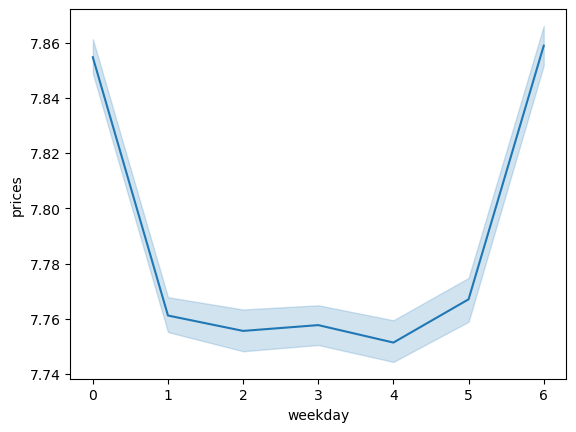

In [36]:
line = sns.lineplot( data = df_2 , x = 'weekday', y = 'prices')

In [37]:
df_main = ords_prods[['weekday','prices']]

C:\Users\hiron\AppData\Local\Temp\ipykernel_8052\2751702823.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  line_main = sns.lineplot( data = df_main , x = 'weekday', y = 'prices',ci=None)


KeyboardInterrupt: 

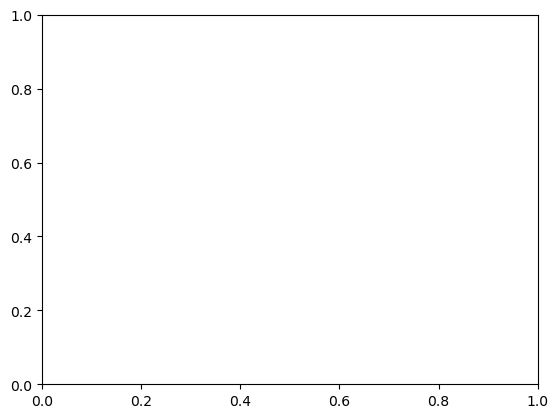

In [39]:
line_main = sns.lineplot( data = df_main , x = 'weekday', y = 'prices',ci=None)